# ORIE 4580/5580/5581 Assignment 4

#### Students: Adrianna Ahn

### Github link: https://github.com/ha266/ORIE4580

Consulted chat gpt for all problems

### Instructions


* Due Friday September 29, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).




---
---


# Question 1: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


___
## Ans.


In [1]:
import numpy as np
from scipy.stats import multivariate_normal

# Define means and covariance matrix
mu = np.array([0.14, 0.07, 0.16])
cov_matrix = np.array([[0.0625, 0, 0], [0, 0.01, 0], [0, 0, 0.09]])

# Define a lower bound for each investment (greater than zero)
lower_bound = np.array([0, 0, 0])

# Calculate the probability using multivariate normal distribution
probability = multivariate_normal.cdf(lower_bound, mean=mu, cov=cov_matrix)

# Probability that all three investments yield positive returns
result = 1 - probability
print(result)


0.9793289644733604


___

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
___

## Ans.



In [2]:
cov_matrix = np.array([[0.0625, -0.01, 0.0375],
                        [-0.01, 0.01, -0.015],
                        [0.0375, -0.015, 0.09]])

# Perform Cholesky decomposition
L = np.linalg.cholesky(cov_matrix)

# Set the number of simulations
num_simulations = 100000

# Initialize a counter for successful simulations
success_count = 0

for _ in range(num_simulations):
    # Generate independent standard normal random samples
    z = np.random.normal(0, 1, 3)

    # Transform the standard normal samples to correlated samples
    correlated_returns = mu + np.dot(L, z)

    # Check if all three investments yield positive returns
    if all(correlated_returns > 0):
        success_count += 1

# Calculate the estimated probability
estimated_probability = success_count / num_simulations
print("Estimated Probability:", estimated_probability)


Estimated Probability: 0.37137


___
___

# Question 2: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

___

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.
___


## Ans.


$\mu_{1} = \mu_{2} = \frac{\alpha+\beta}{2} = 0$ which means that $ \alpha = -\beta$

$ \frac{(\alpha-\beta)^2}{2} = 12 $ which means that $2\alpha^2 = 12$

$\alpha = -\sqrt{3}, \beta = \sqrt{3}$

___

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?
___

## Ans.


$\mathbb{E}[V_2] = \mathbb{E}[V_2|B=0]*P(B=0) + \mathbb{E}[V_2|B=1] * P(B=1)$

$= \mathbb{E}[X_1] * (1-p) + \mathbb{E}[X_2] * p = 0$

$Var(V_2) = \mathbb{E}[V_2^2] - (\mathbb{E}[V_2])^2$

$ \mathbb{E}[V_2^2] = \mathbb{E}[((1-B)X_1 + BX_2)^2]$

___
**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?
___

## Ans.


___

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

___

## Ans.

___

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').
___

## Ans.

___

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.3 \\
		0.3 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

___

## Ans.


___
___

# Question 3: Generating random samples in some given set (20 pts)

___

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).
___

## Ans.

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 119967 (\N{MATHEMATICAL SCRIPT CAPITAL D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


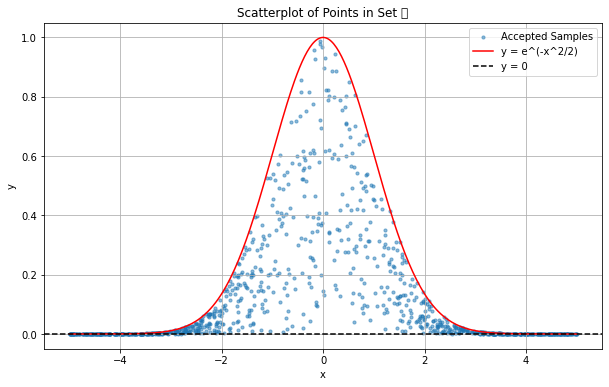

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a random point in the rectangle R
def generate_random_point():
    x = np.random.uniform(-5, 5)  # Choose an appropriate range for x
    y = np.random.uniform(0, np.exp(-x**2/2))
    return x, y

# Number of samples
num_samples = 1000

# Lists to store accepted points
accepted_x = []
accepted_y = []

# Generate samples using acceptance-rejection
while len(accepted_x) < num_samples:
    x, y = generate_random_point()
    if y <= np.exp(-x**2/2):
        accepted_x.append(x)
        accepted_y.append(y)

# Plot the scatterplot of accepted points
plt.figure(figsize=(10, 6))
plt.scatter(accepted_x, accepted_y, s=10, alpha=0.5, label='Accepted Samples')
x_values = np.linspace(-5, 5, 400)
y_values = np.exp(-x_values**2/2)
plt.plot(x_values, y_values, 'r', label='y = e^(-x^2/2)')
plt.axhline(0, color='k', linestyle='--', label='y = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of Points in Set 𝒟')
plt.legend()
plt.grid(True)
plt.show()


___
**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).
___

## Ans.

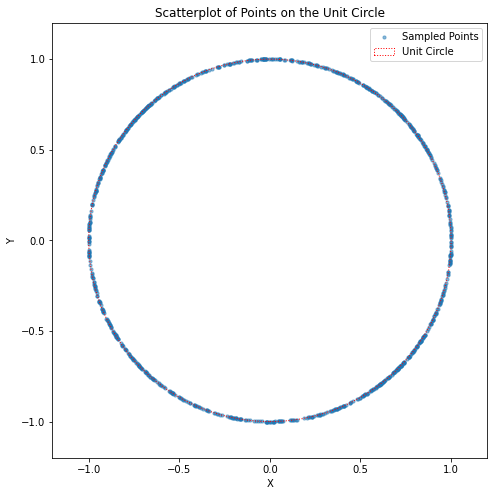

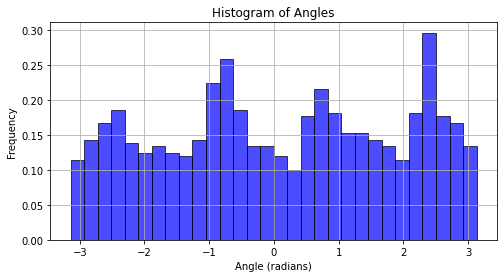

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 1000

# Generate random points in the square [-1, 1]^2
U = np.random.uniform(-1, 1, num_samples)
V = np.random.uniform(-1, 1, num_samples)

# Normalize the points to lie on the unit circle
X = U / np.sqrt(U**2 + V**2)
Y = V / np.sqrt(U**2 + V**2)

# Calculate angles
angles = np.arctan2(Y, X)

# Create a scatterplot of points on the unit circle
plt.figure(figsize=(8, 8))
plt.scatter(X, Y, s=10, alpha=0.5, label='Sampled Points')

# Plot the unit circle
circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='dotted', label='Unit Circle')
plt.gca().add_patch(circle)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of Points on the Unit Circle')
plt.legend()

# Create a histogram of angles
plt.figure(figsize=(8, 4))
plt.hist(angles, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Angle (radians)')
plt.ylabel('Frequency')
plt.title('Histogram of Angles')
plt.grid(True)

plt.show()




---

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$, and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

___

## Ans.

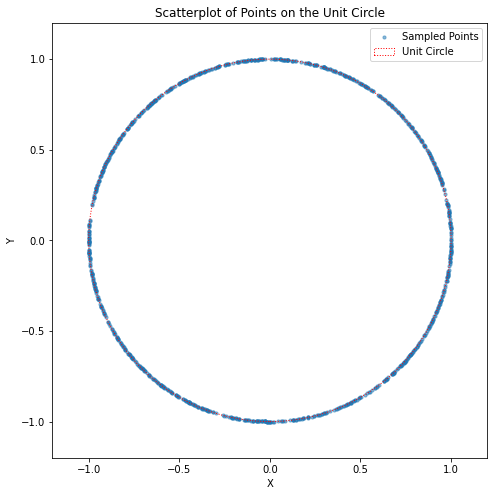

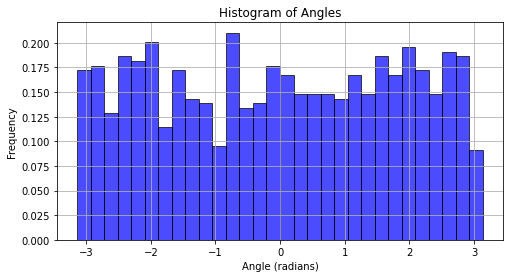

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 1000

# Generate independent standard normal random variables Z and W
Z = np.random.normal(0, 1, num_samples)
W = np.random.normal(0, 1, num_samples)

# Normalize the points to lie on the unit circle
X = Z / np.sqrt(Z**2 + W**2)
Y = W / np.sqrt(Z**2 + W**2)

# Calculate angles
angles = np.arctan2(Y, X)

# Create a scatterplot of points on the unit circle
plt.figure(figsize=(8, 8))
plt.scatter(X, Y, s=10, alpha=0.5, label='Sampled Points')

# Plot the unit circle
circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='dotted', label='Unit Circle')
plt.gca().add_patch(circle)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of Points on the Unit Circle')
plt.legend()

# Create a histogram of angles
plt.figure(figsize=(8, 4))
plt.hist(angles, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Angle (radians)')
plt.ylabel('Frequency')
plt.title('Histogram of Angles')
plt.grid(True)

plt.show()


___
___

# Question 4: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1,000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

___

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.
___


## Ans.

In [6]:
import numpy as np
import scipy.stats as stats

# Set the random seed for reproducibility
np.random.seed(42)

# Number of passengers
num_passengers = 10000

# Generate random arrival times for passengers
arrival_times = np.random.uniform(0, 1000, num_passengers)

# Sort the passengers by arrival time
arrival_times.sort()

# Calculate the waiting times for each passenger
waiting_times = np.arange(0, num_passengers) % 10

# Calculate the mean waiting time
mean_waiting_time = np.mean(waiting_times)

# Calculate confidence intervals (95% confidence level)
confidence_interval = stats.norm.interval(0.95, loc=mean_waiting_time, scale=stats.sem(waiting_times))

print(f"Estimated Mean Waiting Time: {mean_waiting_time:.2f} minutes")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}) minutes")


Estimated Mean Waiting Time: 4.50 minutes
95% Confidence Interval: (4.44, 4.56) minutes


___
**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.
___


## Ans.

In [7]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Number of passengers
num_passengers = 10000

# Generate random arrival times for passengers (as previously generated)
arrival_times = np.random.uniform(0, 1000, num_passengers)

# Sort the passengers by arrival time
arrival_times.sort()

# Generate random inter-arrival times for trains (exponential distribution with mean 10 minutes)
inter_arrival_times = np.random.exponential(scale=10, size=num_passengers)

# Calculate the waiting times for each passenger
waiting_times = np.maximum(0, inter_arrival_times - 10)  # Maximum ensures waiting time is non-negative

# Calculate the mean waiting time
mean_waiting_time = np.mean(waiting_times)

print(f"Estimated Mean Waiting Time: {mean_waiting_time:.2f} minutes")


Estimated Mean Waiting Time: 3.82 minutes


___

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

___

___

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

___

## Ans.

**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

The inspection paradox happens because one is more likely to sample from a larger interval than a short one simply because the larger interval is larger. I.e., I like to think about throwing a needle on a number line from 0 to 10 with just one tick at 9. It is more likely that my needle will land on the 0 to 9 interval than the 9 to 10 interval. 